In [104]:
import numpy as np
from skimage.io import imread
from skimage.color import rgb2gray
from skimage.feature import blob_log
import matplotlib.pyplot as plt
import cv2
from PIL import Image

In [105]:
image1 = cv2.imread("Screenshot (140).png")
image2 = cv2.imread("Screenshot (139).png")
print(image1.shape)
print(image2.shape)

(1080, 614, 3)
(1080, 810, 3)


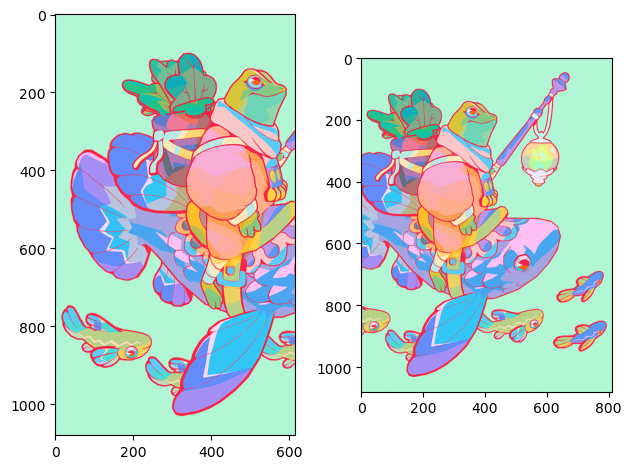

In [107]:
img1 = cv2.imread("Screenshot (140).png")
img2 = cv2.imread("Screenshot (139).png")
fig, axes = plt.subplots(1, 2)
axes[0].imshow(img1)
axes[1].imshow(img2)
plt.tight_layout()
plt.show()

# Brute Force Approach

Number of good matches: 2135


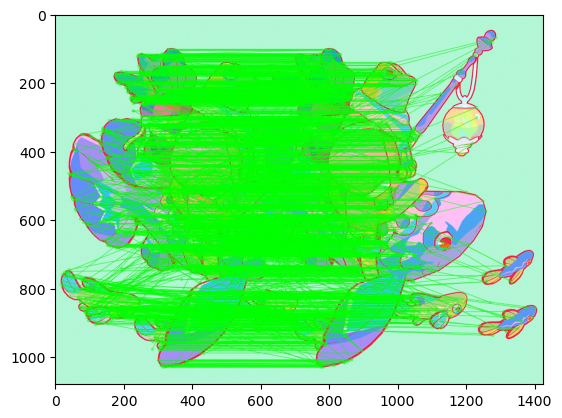

In [129]:
gray1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)
sift = cv2.SIFT_create()
keypoints1, descriptors1 = sift.detectAndCompute(gray1, None)
keypoints2, descriptors2 = sift.detectAndCompute(gray2, None)
bf = cv2.BFMatcher()
matches = bf.match(descriptors1, descriptors2)
sorted_matches = []
for match in matches:
    sorted_matches.append((match.distance, match))
sorted_matches.sort(key=lambda x: x[0])
good_matches = [match for _, match in sorted_matches]
draw_params = dict(matchColor=(0, 255, 0),singlePointColor=None,flags=2)

image_matching = cv2.drawMatches(image1, keypoints1, image2, keypoints2, good_matches, None, **draw_params)
cv2.imwrite('matching_features.jpg', image_matching)
imgg = cv2.imread('matching_features.jpg')
plt.imshow(imgg)

print(f"Number of good matches: {len(good_matches)}")


In [130]:
print(len(keypoints1),len(keypoints2))

2135 2578



# Perform Homography to stitch the image

In [131]:
# Filter the keypoints based on the good matches
good_keypoints1 = [all_keypoints1[m.queryIdx] for m in good_matches]
good_keypoints2 = [all_keypoints2[m.trainIdx] for m in good_matches]

# Extract the matched keypoints
src_points = np.float32([keypoints1[m.queryIdx].pt for m in matches]).reshape(-1, 1, 2)
dst_points = np.float32([keypoints2[m.trainIdx].pt for m in matches]).reshape(-1, 1, 2)

# Estimate the homography matrix using RANSAC
homography, mask = cv2.findHomography(src_points, dst_points, cv2.RANSAC, 5.0)

# Print the estimated homography matrix
print("Estimated Homography Matrix:")
print(homography)


Estimated Homography Matrix:
[[ 1.00006090e+00 -1.82644005e-05 -1.53001682e+02]
 [ 1.52997538e-05  1.00003545e+00 -1.24952706e-02]
 [ 5.47226067e-08  1.00775930e-08  1.00000000e+00]]


In [132]:
result = cv2.warpPerspective(image1, homography, (image2.shape[1], image2.shape[0]))
blended_image = cv2.addWeighted(result,0, image2,0.9, 0)
cv2.imwrite("imge_new.jpg",blended_image)


True

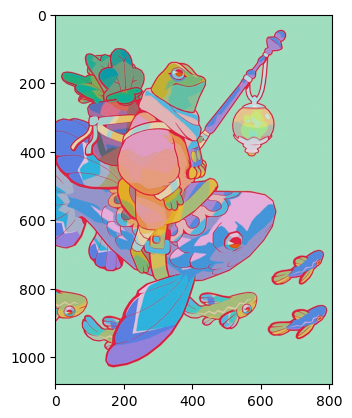

In [133]:
imgg = cv2.imread('imge_new.jpg')
plt.imshow(imgg)